Nombre= Andrea Isabel Coral Vela
ID= 1004580183

1. Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos
acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando
pandas datareader. Con esta información: 

*   a. Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los resultados en una tabla.
*   b. Calcule los retornos esperados y volatilidades anualizadas.
*   c. Construya una tabla resumen con las estadísticas descriptivas de las    series diarias (media, mediana, desv. estándar, curtosis, simetría) de los dos activos.
*   d. Compare las distribuciones empíricas de los dos activos con la distribución teórica normal.
*   e. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.
*   f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos.






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
!pip install --quiet yfinance
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.9 MB/s eta 0:00:00


INFORMACION DE LAS DOS ACCIONES 

Datos acciones amazon y meta con resultados diarios 

In [ ]:
from pandas_datareader import data as wb
from datetime import datetime

In [ ]:
yf.pdr_override()

#Punto 1

#A





In [ ]:
activos = ["MSFT", "MCO"]
precios_diarios =wb.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")["Adj Close"] 
retornos_diarios = np.log(precios_diarios/precios_diarios.shift(1)).dropna()
retornos_diarios.head()



[*********************100%***********************]  2 of 2 completed


,MCO,MSFT
Date,,
2021-01-05,-0.026442,0.000964
2021-01-06,-0.010712,-0.026271
2021-01-07,0.000107,0.028059
2021-01-08,-0.004167,0.006074
2021-01-11,-0.013871,-0.009746


In [ ]:
promedio_retornos_diarios = retornos_diarios.mean()
df1 = pd.DataFrame(promedio_retornos_diarios)

In [ ]:
retornos_menusales = retornos_diarios.mean()*21
df2 = pd.DataFrame(retornos_menusales)

In [ ]:
retornos_anualizados = retornos_diarios.mean()*252
df3 = pd.DataFrame(retornos_anualizados)

In [ ]:
table = pd.concat([df1, df2, df3], axis=1)
table.columns = ['Retornos diarios', 'Retornos mensuales','Retornos anualizados']
table

,Retornos diarios,Retornos mensuales,Retornos anualizados
MCO,-0.000060,-0.001264,-0.015162
MSFT,0.000228,0.004789,0.057473


#B

In [ ]:
retornos_diarios.std()

MCO     0.017948
MSFT    0.018335
dtype: float64

In [ ]:
retornos_diarios.std()*np.sqrt(21)

MCO     0.082248
MSFT    0.084022
dtype: float64

In [ ]:
retornos_diarios.std()*np.sqrt(252)

MCO     0.284915
MSFT    0.291062
dtype: float64

#C

In [ ]:
Media = pd.DataFrame(retornos_diarios.mean())

In [ ]:
Mediana = pd.DataFrame(retornos_diarios.median())

In [ ]:
Desviacion = pd.DataFrame(retornos_diarios.std())

In [ ]:
Curtosis = pd.DataFrame(retornos_diarios.kurtosis())

In [ ]:
Asimetria = pd.DataFrame(retornos_diarios.skew())

In [ ]:
Estadística_descriptiva = pd.concat([Media,Mediana,Desviacion,Curtosis,Asimetria], axis=1)
Estadística_descriptiva.columns = ['Media', 'Mediana','Desviación Estandar','Curtosis', 'Asimetría']
Estadística_descriptiva


,Media,Mediana,Desviación Estandar,Curtosis,Asimetría
MCO,-0.000060,0.000423,0.017948,3.592692,0.194332
MSFT,0.000228,-0.000084,0.018335,1.600732,-0.084967


#D

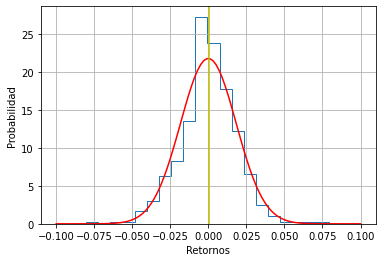

In [ ]:
from scipy.stats import norm
retornos_diarios['MSFT'].hist(bins=20,density=True,histtype="step")
x = np.linspace(-0.1,0.1,num=100)
sigma=retornos_diarios['MSFT'].std()
plt.plot(x,norm.pdf(x,scale=sigma),"r")
plt.axvline(retornos_diarios['MSFT'].mean(),color="y");
plt.xlabel("Retornos")
plt.ylabel("Probabilidad");


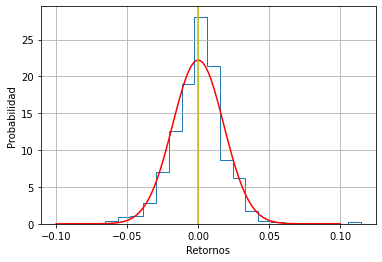

In [ ]:
from scipy.stats import norm
retornos_diarios['MCO'].hist(bins=20,density=True,histtype="step")
x = np.linspace(-0.1,0.1,num=100)
sigma=retornos_diarios['MCO'].std()
plt.plot(x,norm.pdf(x,scale=sigma),"r")
plt.axvline(retornos_diarios['MCO'].mean(),color="y");
plt.xlabel("Retornos")
plt.ylabel("Probabilidad");

#E

Correlación Pearson

In [ ]:
retornos_diarios['MSFT'].corr(retornos_diarios['MCO'],method="pearson")

0.6681240255455739

Correlación Kendall

In [ ]:
import scipy.stats as stats
stats.kendalltau(retornos_diarios['MSFT'], retornos_diarios['MCO'])

KendalltauResult(correlation=0.497031820950963, pvalue=3.2269138486541147e-62)

In [ ]:
retornos_diarios['MSFT'].corr(retornos_diarios['MCO'], method='kendall')

0.497031820950963

Correlación Spearman

In [ ]:
stats.spearmanr(retornos_diarios['MSFT'], retornos_diarios['MCO'])

SpearmanrResult(correlation=0.67677938089381, pvalue=1.6387727124380445e-68)

In [ ]:
retornos_diarios['MSFT'].corr(retornos_diarios['MCO'], method='spearman')

0.67677938089381

#Punto 2

In [ ]:
activos = ["AMZN", "PYPL","AAPL","GPS","META","GOOG","TSLA","AXP","VZ","KO"]
precios_mensuales =wb.get_data_yahoo(activos,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"] 
retornos_m= np.log(precios_mensuales/precios_mensuales.shift(1)).dropna()
retornos_m.head()

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,AXP,GOOG,GPS,KO,META,PYPL,TSLA,VZ
Date,,,,,,,,,,
2018-01-01,-0.010693,0.215627,0.000906,0.111597,-0.024370,0.036593,0.057426,0.147492,0.129255,0.021309
2018-02-01,0.061892,0.041554,-0.015675,-0.057352,-0.044454,-0.096319,-0.046940,-0.071785,-0.032267,-0.113185
2018-03-01,-0.055735,-0.044003,-0.044349,-0.068306,-0.012106,0.004847,-0.109719,-0.045603,-0.253920,0.001675
2018-04-01,-0.015134,0.078880,0.056985,-0.014114,-0.064880,0.003710,0.073634,-0.016747,0.099255,0.031494
2018-05-01,0.122893,0.039739,-0.000820,0.064389,-0.035934,-0.004872,0.108854,0.095298,-0.031698,-0.022131


#A

In [ ]:
retorno_anualizado = retornos_m.mean()*12

In [ ]:
retornos_m.std()*np.sqrt(12)

AAPL    0.319091
AMZN    0.338207
AXP     0.291930
GOOG    0.259863
GPS     0.581690
KO      0.197600
META    0.402351
PYPL    0.399430
TSLA    0.679090
VZ      0.171293
dtype: float64

#B

In [ ]:
Ranqueo_activos = pd.DataFrame(retorno_anualizado, columns=['Retornos Anualizados'])
Ranqueo_activos.sort_values("Retornos Anualizados")


,Retornos Anualizados
GPS,-0.188896
META,-0.076555
VZ,-0.013388
PYPL,-0.006629
AMZN,0.072449
AXP,0.093692
KO,0.097156
GOOG,0.105644
AAPL,0.234476
TSLA,0.356156


#Punto 3

In [ ]:
activos = ["^RUT"]
precios_mensuales_rusell =wb.get_data_yahoo(activos,start="2011-12-01",end="2022-12-31",interval="1Mo")["Adj Close"] 
retornos_rusell = np.log(precios_mensuales_rusell/precios_mensuales_rusell.shift(1)).dropna()
retornos_rusell.head()

[*********************100%***********************]  1 of 1 completed


Date
2012-01-01    0.067704
2012-02-01    0.022598
2012-03-01    0.023593
2012-04-01   -0.016295
2012-05-01   -0.069782
Name: Adj Close, dtype: float64

#A

In [ ]:
sigma = retornos_rusell.std()
sigma

0.05474479591479422

In [ ]:
sigma*np.sqrt(12)

0.18964153594882538

#B

In [ ]:
activos = ["^RUT"]
precios_mensuales_rusell =wb.get_data_yahoo(activos,start="2011-12-01",end="2022-12-31",interval="1Mo")
retornos_rusell_completo = np.log(precios_mensuales_rusell/precios_mensuales_rusell.shift(1)).dropna()


[*********************100%***********************]  1 of 1 completed


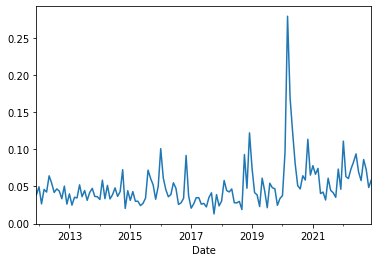

In [ ]:
High_low = np.log(precios_mensuales_rusell["High"]/precios_mensuales_rusell["Low"]).dropna()
sigma_parkinson = ((1/(4*np.log(2)))*High_low**2)**0.5
sigma_parkinson.plot()

In [ ]:
sigma_parkinson.mean()*np.sqrt(12)

0.1767113126308943

#C

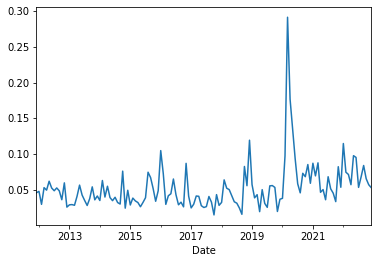

In [ ]:
High_low_GK = np.log(precios_mensuales_rusell["High"]/precios_mensuales_rusell["Low"]).dropna()
Close_open_GK = np.log(precios_mensuales_rusell["Close"]/precios_mensuales_rusell["Open"]).dropna()
sigma_GK = (0.5*High_low_GK**2-(2*np.log(2)-1)*Close_open_GK**2)**0.5
sigma_GK.plot()

In [ ]:
sigma_GK.mean()*np.sqrt(12)

0.1815139038491142

#D

In [ ]:
activos = ["^RUT"]
precios_mensuales_rusell =wb.get_data_yahoo(activos,start="2011-12-01",end="2022-12-31",interval="1Mo")['Adj Close']
retornos_rusell = np.log(precios_mensuales_rusell/precios_mensuales_rusell.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [139]:
def ewma_vol(retornos,Lambda):
  k = len(retornos)                     
  e = np.arange(k-1,-1,-1)              
  alpha = Lambda**e                     
  s_var = (retornos**2)*alpha           
  var = s_var.sum()*(1-Lambda)          
  vol = np.sqrt(var)                    
  return(vol)

In [141]:
vol_ewma = ewma_vol(retornos_rusell,Lambda=0.94)
vol_ewma

0.06830769009655513

Volatilidad anualizada

In [143]:
vol_ewma*np.sqrt(12)

0.23662477958980582